In [ ]:
import pandas
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab as py
from matplotlib import pyplot as plt
import statistics
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statsmodels
from scipy import stats
from sklearn import linear_model

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# Задание 2

In [ ]:
data = pandas.read_excel('/content/drive/My Drive/lr/lr2/data.xlsx', sheet_name='Лист1')
print(data.head())

        Дата    BAR       RUB       NGN
0 2020-10-01  40.93  0.012693  0.002558
1 2020-09-01  40.95  0.013549  0.002604
2 2020-08-01  45.28  0.013619  0.002610
3 2020-07-01  43.30  0.014196  0.002621
4 2020-06-01  41.15  0.014134  0.002568


# Задание 3


In [ ]:
sc=preprocessing.StandardScaler()

t3=data.copy()
for i in data.columns[1:]:
  t3[[i]]=sc.fit_transform(data[[i]])
print(t3.head())#стандартизация

        Дата       BAR       RUB       NGN
0 2020-10-01 -1.164441 -2.221555 -0.759138
1 2020-09-01 -1.162895 -1.569414 -0.689388
2 2020-08-01 -0.828256 -1.516338 -0.681014
3 2020-07-01 -0.981278 -1.076997 -0.665165
4 2020-06-01 -1.147438 -1.124459 -0.744304


https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html -описание функции построения
http://espressocode.top/qqplot-quantile-quantile-plot-in-python/ - описание кк , смысла

https://www.statsmodels.org/v0.10.0/generated/statsmodels.graphics.gofplots.ProbPlot.ppplot.html - ppplot
other

ProbPlot, array-like, or None, optional
If provided, ECDF(x) will be plotted against p(x) where x are sorted samples from self. ECDF is an empirical cumulative distribution function estimated from other and p(x) = 0.5/n, 1.5/n, …, (n-0.5)/n where n is the number of samples in self. If an array-object is provided, it will be turned into a ProbPlot instance default parameters. If not provided (default), self.dist(x) is be plotted against p(x).
https://www.statsmodels.org/0.6.1/generated/statsmodels.graphics.gofplots.ProbPlot.html - в целом ProbPlot

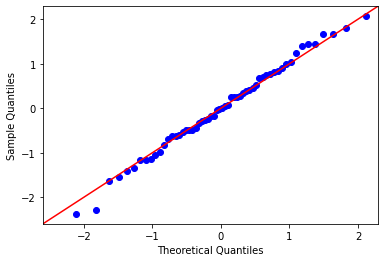

In [ ]:
sm.qqplot(t3['BAR'], line ='45',fit=True)
py.show()

Text(0.5, 1.0, ' compare two sample sets')

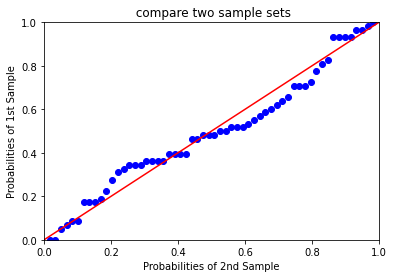

In [ ]:
pp_x = sm.ProbPlot(t3['BAR'], fit=True)
# Can take arguments specifying the parameters for dist or fit them automatically.
pp_y =sm.ProbPlot(np.random.standard_normal(t3['BAR'].count()), fit=True)

pp_x.ppplot( line ='45',other=pp_y)

py.title(" compare two sample sets")



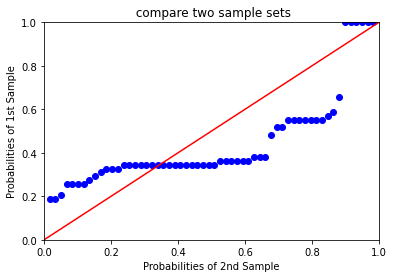

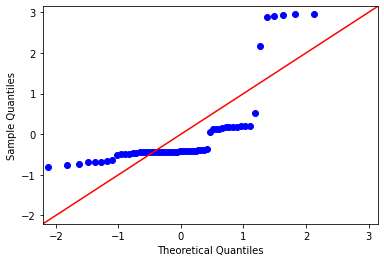

In [ ]:
pp_x = sm.ProbPlot(t3['NGN'], fit=True)
# Can take arguments specifying the parameters for dist or fit them automatically.
pp_y =sm.ProbPlot(np.random.standard_normal(t3['NGN'].count()), fit=True)

pp_x.ppplot( line ='45',other=pp_y)

py.title(" compare two sample sets")
sm.qqplot(t3['NGN'], line ='45',fit=True)
py.show()


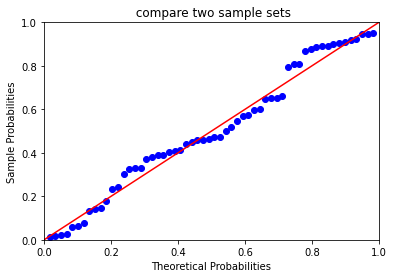

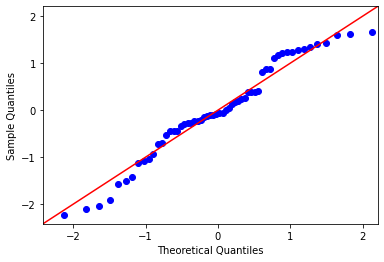

In [ ]:
pp_x = sm.ProbPlot(t3['RUB'], fit=True)
# Can take arguments specifying the parameters for dist or fit them automatically.
pp_y =sm.ProbPlot(np.random.standard_normal(t3['RUB'].count()), fit=True)

pp_x.ppplot( line ='45')

py.title(" compare two sample sets")
sm.qqplot(t3['RUB'], line ='45',fit=True)
py.show()



# Задание 4

In [ ]:
t3.describe() # медиана - квантиль 50%

,BAR,RUB,NGN
count,5.800000e+01,5.800000e+01,5.800000e+01
mean,-7.656711e-17,-3.407236e-16,-3.828355e-17
std,1.008734e+00,1.008734e+00,1.008734e+00
min,-2.374706e+00,-2.221555e+00,-8.013136e-01
25%,-6.153392e-01,-4.475187e-01,-4.506053e-01
50%,-6.729023e-03,-7.797602e-02,-4.249311e-01
75%,7.344229e-01,8.628614e-01,1.572689e-01
max,2.066023e+00,1.665595e+00,2.958824e+00


In [ ]:
statistics.mode(t3['BAR'])#мода барель

0.25139897028570923

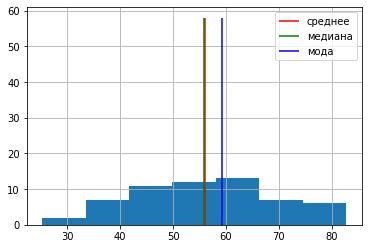

In [ ]:
fig, ax = plt.subplots()

ax.vlines(data['BAR'].mean(),0,data['BAR'].size,color='r',label='среднее')
ax.vlines(data['BAR'].median(),0,data['BAR'].size,color='g',label='медиана')
ax.vlines(data['BAR'].mode()[0],0,data['BAR'].size,color='b',label='мода')

data['BAR'].hist(bins=7) #по ф-ле Стерджесса
ax.legend()
plt.show()

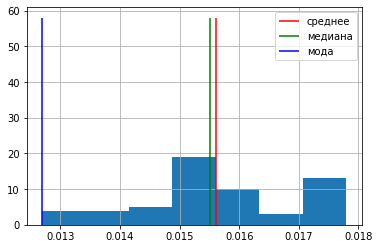

In [ ]:
fig, ax = plt.subplots()

ax.vlines(data['RUB'].mean(),0,data['RUB'].size,color='r',label='среднее')
ax.vlines(data['RUB'].median(),0,data['RUB'].size,color='g',label='медиана')
ax.vlines(data['RUB'].mode()[0],0,data['RUB'].size,color='b',label='мода')

data['RUB'].hist(bins=7) #по ф-ле Стерджесса
ax.legend()
plt.show()

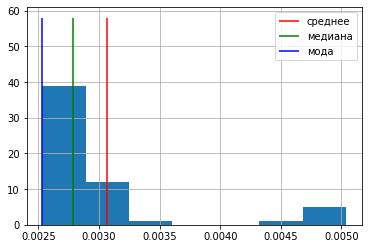

In [ ]:
fig, ax = plt.subplots()

ax.vlines(data['NGN'].mean(),0,data['NGN'].size,color='r',label='среднее')
ax.vlines(data['NGN'].median(),0,data['NGN'].size,color='g',label='медиана')
ax.vlines(data['NGN'].mode()[0],0,data['NGN'].size,color='b',label='мода')

data['NGN'].hist(bins=7) #по ф-ле Стерджесса
ax.legend()
plt.show()

# Задание 5

Статистическая гипотеза о генеральном распределении называется простой, если при условии истинности гипотезы закон распределения генеральной совокупности однозначно определен. В противном лучае гипотеза называется сложной. Т.е. т.к. мы проверяем только на нормальность, то у нас сложная.

Критерий АНдерсона- ДАрлинга в случае првеорка сложных гипотез является свободным от распределения, то есть не зависит от вида закона, с которым проверяется согласие. То есть неспецифичен для нормального распредления. не берем его.

критерий Шапиро-Уилка (в стандарте ГОСТ РИСО 5479-2002 применяется при объемах выборки от 8 до 50). Т.о. используем критерий Колмогорова. Кроме того kstest берет массив квантилей и возвращает соответствующее значение функции кумулятивной плотности, с которой мы сталкивались частично ранее.

ШУ, т.к. меньше 2к измерений

In [ ]:
print(stats.kstest(t3['BAR'], "norm"))
print(stats.kstest(t3['RUB'], "norm") )
print(stats.kstest(t3['NGN'], "norm") )

KstestResult(statistic=0.047523030197969884, pvalue=0.9994374686686768)
KstestResult(statistic=0.09086584181937585, pvalue=0.7237519350903238)
KstestResult(statistic=0.31364536051150504, pvalue=1.4367357448890255e-05)


In [ ]:
scipy.stats.shapiro(t3['BAR'])

(0.9899967312812805, 0.9144988656044006)

In [ ]:
scipy.stats.shapiro(t3['RUB'])

(0.9603713750839233, 0.055638331919908524)

In [ ]:
scipy.stats.shapiro(t3['NGN'])

(0.6009345054626465, 2.673896000449094e-11)

Нормальное распределение у рубля и бареля. у нигерийской найры- нет

# Задание 6

In [ ]:
print(t3.quantile([ .05,.95]))

           BAR       RUB       NGN
0.05 -1.562143 -1.934818 -0.699399
0.95  1.668205  1.456282  2.916385


In [ ]:
desc=t3.describe()
desc

,BAR,RUB,NGN
count,5.800000e+01,5.800000e+01,5.800000e+01
mean,-7.656711e-17,-3.407236e-16,-3.828355e-17
std,1.008734e+00,1.008734e+00,1.008734e+00
min,-2.374706e+00,-2.221555e+00,-8.013136e-01
25%,-6.153392e-01,-4.475187e-01,-4.506053e-01
50%,-6.729023e-03,-7.797602e-02,-4.249311e-01
75%,7.344229e-01,8.628614e-01,1.572689e-01
max,2.066023e+00,1.665595e+00,2.958824e+00


In [ ]:
t61=t3[(desc.loc['mean','BAR']+3*desc.loc['std','BAR']>t3['BAR']) & (desc.loc['mean','BAR']-3*desc.loc['std','BAR']<t3['BAR'])]['BAR']

In [ ]:
#t61= t6[ (q.loc[0.95,"BAR"] > t6["BAR"]) & (q.loc[0.05,"BAR"] <t6["BAR"])]['BAR']

In [ ]:
scipy.stats.shapiro(t61)

(0.9899967312812805, 0.9144988656044006)

In [ ]:
#t62= t6[ (q.loc[0.95,"NGN"] > t6["NGN"]) & (q.loc[0.05,"NGN"] <t6["NGN"])]['NGN']

In [ ]:
t62=t3[(desc.loc['mean','RUB']+3*desc.loc['std','RUB']>t3['RUB']) & (desc.loc['mean','RUB']-3*desc.loc['std','RUB']<t3['RUB'])]['RUB']

In [ ]:
scipy.stats.shapiro(t62)

(0.9603713750839233, 0.055638331919908524)

In [ ]:
#t63= t6[ (q.loc[0.95,"RUB"] > t6["RUB"]) & (q.loc[0.05,"RUB"] <t6["RUB"])]['RUB']

In [ ]:
t63=t3[(desc.loc['mean','NGN']+3*desc.loc['std','NGN']>t3['NGN']) & (desc.loc['mean','NGN']-3*desc.loc['std','NGN']<t3['NGN'])]['NGN']

In [ ]:
scipy.stats.shapiro(t63)

(0.6009345054626465, 2.673896000449094e-11)

Результат не изменился. Нормальное распределение у рубля и бареля. У нигерийской найры- нет

# Задание 7

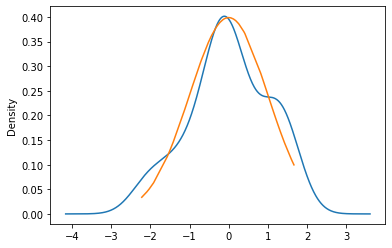

In [ ]:
from scipy.stats import norm
t3['RUB'].plot.kde()
pl=np.sort(t3['RUB'])
plt.plot(pl,norm.pdf(pl,pl.mean(),1))

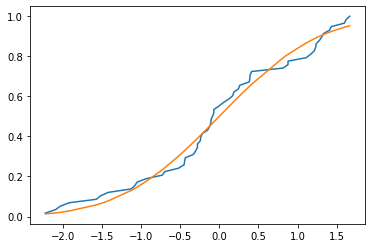

In [ ]:
pl=np.sort(t3['RUB'])
y=np.arange(1,len(pl)+1)/len(pl)
plt.plot(pl,y)
plt.plot(pl,scipy.stats.norm.cdf(pl,pl.mean(),1))
plt.show()

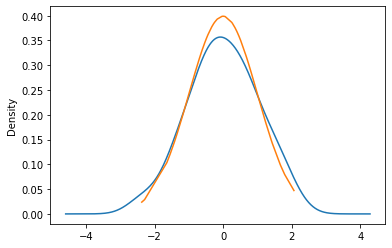

In [ ]:
t3['BAR'].plot.kde()
pl=np.sort(t3['BAR'])
plt.plot(pl,norm.pdf(pl,pl.mean(),1))

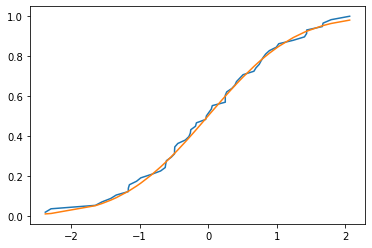

In [ ]:
pl=np.sort(t3['BAR'])
y=np.arange(1,len(pl)+1)/len(pl)
plt.plot(pl,y)
plt.plot(pl,scipy.stats.norm.cdf(pl,pl.mean(),1))
plt.show()

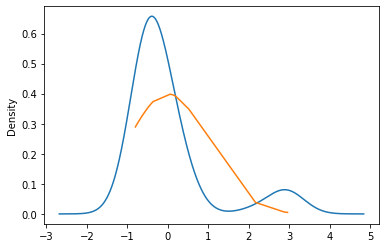

In [ ]:
t3['NGN'].plot.kde()
pl=np.sort(t3['NGN'])
plt.plot(pl,norm.pdf(pl,pl.mean(),1))

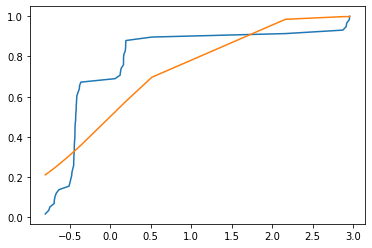

In [ ]:
pl=np.sort(t3['NGN'])
y=np.arange(1,len(pl)+1)/len(pl)
plt.plot(pl,y)
plt.plot(pl,scipy.stats.norm.cdf(pl,pl.mean(),1))
plt.show()

# Задание 8

Интуиция для ранговой корреляции Спирмена состоит в том, что он вычисляет корреляцию Пирсона (например, параметрическую меру корреляции), используя ранговые значения вместо реальных значений. Где корреляция Пирсона - это расчет ковариации (или ожидаемой разницы наблюдений от среднего) между двумя переменными, нормализованными по дисперсии или разбросу обеих переменных.

используем ШУ, т.к. у нас до 2к измерений

In [ ]:
from scipy import stats
print(stats.spearmanr(t3['NGN'],t3['RUB']))
print(stats.spearmanr(t3['BAR'],t3['RUB']))
print(stats.spearmanr(t3['NGN'],t3['BAR']))
# H0 - не корр


SpearmanrResult(correlation=0.3395059829585653, pvalue=0.009127118195964385)
SpearmanrResult(correlation=0.42776060299086666, pvalue=0.0008099961642175627)
SpearmanrResult(correlation=-0.18177902934721543, pvalue=0.17204567275996752)


Интуиция для теста состоит в том, что он вычисляет нормированную оценку для числа совпадающих или согласованных ранжирований между двумя выборками
обе ранжируем, одну упорядочиваем. Для каждого ранга   из числа следующих за ним рангов подсчитывается количество больших него по величине рангов и число рангов, меньших по значению

In [ ]:
print(stats.kendalltau(t3['NGN'],t3['RUB']))
print(stats.kendalltau(t3['BAR'],t3['RUB']))
print(stats.kendalltau(t3['NGN'],t3['BAR']))
# H0 - не корр



KendalltauResult(correlation=0.2450090744101633, pvalue=0.006592951160275788)
KendalltauResult(correlation=0.29133879644104854, pvalue=0.001251479118633479)
KendalltauResult(correlation=-0.15445196069120037, pvalue=0.0871335462850623)


Коэффициенты корреляции Спирмена и Кендалла используются как меры взаимозависимости между рядами рангов, а не как меры связи между самими переменными и используются чаще для анализа качественных перменных.

корреляция Пирсона требует, чтобы каждый набор данных был нормально распределен. Как и другие коэффициенты корреляции, этот колеблется от -1 до +1, причем 0 не подразумевает никакой корреляции. Корреляции -1 или +1 подразумевают точную линейную зависимость. Позитивная корреляция подразумевает, что Х увеличивается и у. Отрицательные корреляции подразумевает, что как X увеличивается и y уменьшается. P-значение приблизительно указывает на вероятность того, что некоррелированная система создаст наборы данных, которые имеют корреляцию Пирсона, по крайней мере, такую же экстремальную, как и вычисленная из этих наборов данных.

Коэффициент корреляции r - Пирсона оценивает только линейную связь
переменных. Нелинейную связь данный коэффициент выявить не может. Коэффициент корреляции Пирсона очень чувствителен к аутлаерам
(выбросам).
Корреляция не подразумевает наличия причинно-следственной связи
между переменными.

хоть все имеют минусы, но лучше использовать Пирсона.

In [ ]:
print(stats.pearsonr(t3['NGN'],t3['RUB']))
print(stats.pearsonr(t3['BAR'],t3['RUB']))
print(stats.pearsonr(t3['NGN'],t3['BAR']))

(-0.19510440153756542, 0.14219360767100075)
(0.47183039178988845, 0.00018478240864544862)
(-0.37110097349571325, 0.0041323768847454775)


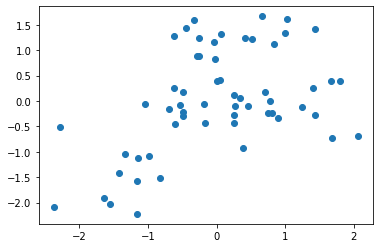

In [ ]:
plt.scatter(t3.BAR.values, t3.RUB.values)#характер зависимости  не линейный
#только у них двух нормальное распредление
#значит используем Спирмена 

# Задание 9

1 вариант

In [ ]:
def plot_regression_line(x, y, b):

    # построение фактических точек в виде точечной диаграммы

    plt.scatter(x, y, color = "r",

               marker = "o", s = 30)

  

    # предсказанный 

    y_pred = b[0] + b[1]*x

  

    #  линия регрессии

    plt.plot(x, y_pred, color = "g")
  
    plt.show()

In [ ]:
def estimate_coef(x, y):

    # количество наблюдений 

    n = np.size(x)

  

    # среднее значение вектора x и y

    m_x, m_y = np.mean(x), np.mean(y)

  

    # вычисление  отклонения 

    SS_xy = np.sum(y*x) - n*m_y*m_x

    SS_xx = np.sum(x*x) - n*m_x*m_x

  

    # вычисление коэффициентов регрессии

    b_1 = SS_xy / SS_xx

    b_0 = m_y - b_1*m_x

  

    return(b_0, b_1)




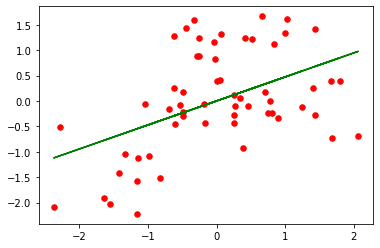

In [ ]:
# оценка коэффициентов

b = estimate_coef(t3['BAR'],t3['RUB'])


# построение линии регрессии
plot_regression_line(t3['BAR'],t3['RUB'], b)

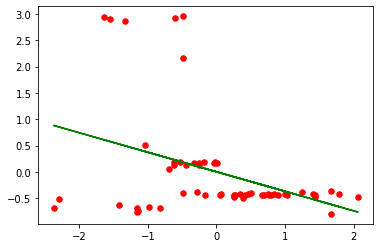

In [ ]:
# оценка коэффициентов

b = estimate_coef(t3['BAR'],t3['NGN'])


# построение линии регрессии
plot_regression_line(t3['BAR'],t3['NGN'], b)

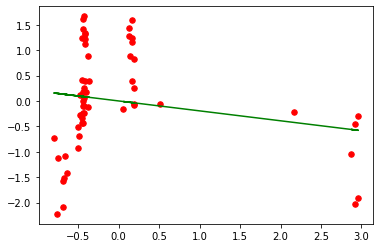

In [ ]:
# оценка коэффициентов

b = estimate_coef(t3['NGN'],t3['RUB'])


# построение линии регрессии
plot_regression_line(t3['NGN'],t3['RUB'], b)

2 вариант

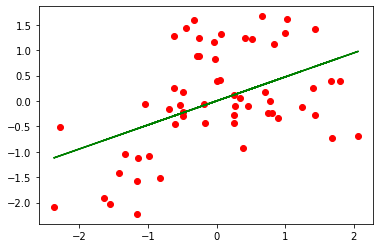

In [ ]:
model1=linear_model.LinearRegression()
model1.fit(t3['BAR'].values.reshape(-1,1),t3['RUB'])
pred=model1.predict(t3['BAR'].values.reshape(-1,1))
plt.plot(t3['BAR'],pred,c='green')
plt.scatter(t3['BAR'],t3['RUB'],c='red')
plt.show()

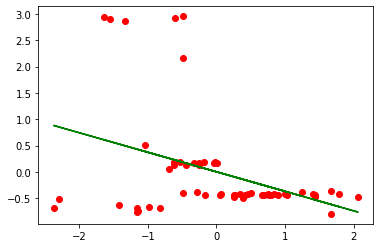

In [ ]:
model2=linear_model.LinearRegression()
model2.fit(t3['BAR'].values.reshape(-1,1),t3['NGN'])
pred=model2.predict(t3['BAR'].values.reshape(-1,1))
plt.plot(t3['BAR'],pred,c='green')
plt.scatter(t3['BAR'],t3['NGN'],c='red')
plt.show()

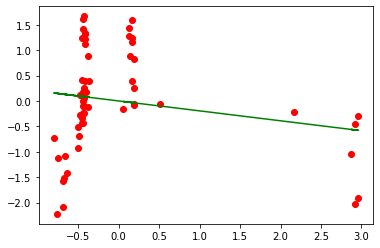

In [ ]:
model3=linear_model.LinearRegression()
model3.fit(t3['NGN'].values.reshape(-1,1),t3['RUB'])
pred=model3.predict(t3['NGN'].values.reshape(-1,1))
plt.plot(t3['NGN'],pred,c='green')
plt.scatter(t3['NGN'],t3['RUB'],c='red')
plt.show()

In [ ]:
>>> # example 7
>>> x = np.random.normal(loc=8.25, scale=2.75, size=37)
>>> y = np.random.normal(loc=8.75, scale=3.25, size=57)

>>> pp_x = sm.ProbPlot(x, fit=True)
>>> pp_y = sm.ProbPlot(y, fit=True)
>>> pp_y.ppplot(line="45", other=pp_x)
>>> py.title("Ex. 7A- ppplot - compare two sample sets, other=pp_x")
>>> pp_x.ppplot(line="45", other=pp_y)
>>> py.title("Ex. 7B- ppplot - compare two sample sets, other=pp_y")
>>> py.show()